In [1]:
import gdown

In [2]:
!gdown --id 1MIAVTI2o-9166Pv2iinYXzVZNOremtEO

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1MIAVTI2o-9166Pv2iinYXzVZNOremtEO
From (redirected): https://drive.google.com/uc?id=1MIAVTI2o-9166Pv2iinYXzVZNOremtEO&confirm=t&uuid=ff35ca8d-5b05-4108-aec7-62a4d711da4d
To: /content/test.zip
100% 5.18M/5.18M [00:00<00:00, 163MB/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/4/2205.png         
  inflating: test/4/2074.png         
  inflating: test/4/2206.png         
  inflating: test/4/2306.png         
  inflating: test/4/2046.png         
  inflating: test/4/2464.png         
  inflating: test/4/2169.png         
  inflating: test/4/2130.png         
  inflating: test/4/2402.png         
  inflating: test/4/2307.png         
  inflating: test/4/2530.png         
  inflating: test/4/2819.png         
  inflating: test/4/2386.png         
  inflating: test/4/2509.png         
  inflating: test/4/2053.png         
  inflating: test/4/2264.png         
  inflating: test/4/2249.png         
  inflating: test/4/2630.png         
  inflating: test/4/2447.png         
  inflating: test/4/2368.png         
  inflating: test/4/2330.png         
  inflating: test/4/2806.png         
  inflating: test/4/2084.png         
  inflating: test/4/2165.png         
  inflating: test/4/2090.png         

In [8]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import backend as k
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder="/content/test"

In [9]:
def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255.0
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [10]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
img_data = np.array(img_data)
target_val = np.array(target_val)

In [11]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(img_data,target_val,test_size=0.1,train_size=0.9)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.1,train_size =0.9)

In [12]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(8110, 28, 28, 3)
(902, 28, 28, 3)
(1002, 28, 28, 3)


In [15]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [16]:
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout,BatchNormalization
from tensorflow.keras import regularizers
from keras.models import Model
import tensorflow as tf

In [28]:
def my_model(img_size=80,channels=3):
    model = Sequential()
    model.add(Conv2D(input_shape=(28,28,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    #model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    #model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",bias_regularizer=regularizers.l2(l2=0.0001 )))
    #model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))


    model.add(Flatten())
    model.add(Dense(1024,activation=('relu'),input_dim=512))
    model.add(Dense(512,activation=('relu')))
    model.add(Dense(256,activation=('relu')))

    model.add(Dense(128,activation=('relu')))
    model.add(Dropout(0.1))
    model.add(Dense(10,activation=('softmax')))
    return model

In [29]:
model = my_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 1, 1, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,32

 Total params: 5,757,258 (21.96 MB)

 Trainable params: 5,755,338 (21.95 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [33]:
from tensorflow.keras.metrics import Recall, Precision
batch_size= 64
epochs=10
learning_rate=.001
sgd=SGD(learning_rate,momentum=.9,nesterov=False)
opt = Adam()
Metrics=['accuracy',Recall(),Precision()]

In [34]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=Metrics)
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [35]:
hist = model.fit(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs=epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), callbacks = [lrr], verbose = 1,shuffle=True)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 130ms/step - accuracy: 0.7593 - loss: 0.7435 - precision: 0.8700 - recall: 0.6760 - val_accuracy: 0.1053 - val_loss: 6.1976 - val_precision: 0.1053 - val_recall: 0.1053 - learning_rate: 0.0010
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9375 - loss: 0.1973 - precision: 0.9375 - recall: 0.9375 - val_accuracy: 0.1053 - val_loss: 5.8142 - val_precision: 0.1053 - val_recall: 0.1053 - learning_rate: 0.0010
Epoch 3/10
  1/126 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 1.0000 - loss: 0.0307 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9659 - loss: 0.1286 - precision: 0.9701 - recall: 0.9611 - val_accuracy: 0.1053 - val_loss: 7.8994 - val_precision: 0.1056 - val_recall: 0.1053 - learning_rate: 0.0010
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0436 - precision: 0.9844 - recall: 0.9844 - val_accuracy: 0.1053 - val_loss: 8.9919 - val_precision: 0.1053 - val_recall: 0.1053 - learning_rate: 0.0010
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9687 - loss: 0.1117 - precision: 0.9785 - recall: 0.9591 - val_accuracy: 0.4146 - val_loss: 2.3897 - val_precision: 0.4184 - val_recall: 0.3836 - learning_rate: 1.0000e-05
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.9844 - loss: 0.0611 - precision: 0.9844 - recall: 0.9844 - val_accuracy: 0.4213 - val_loss: 2.3405 - val_precision: 0.4277 - val_recall: 0.3936 - learning_rate: 1.0000e-05
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy

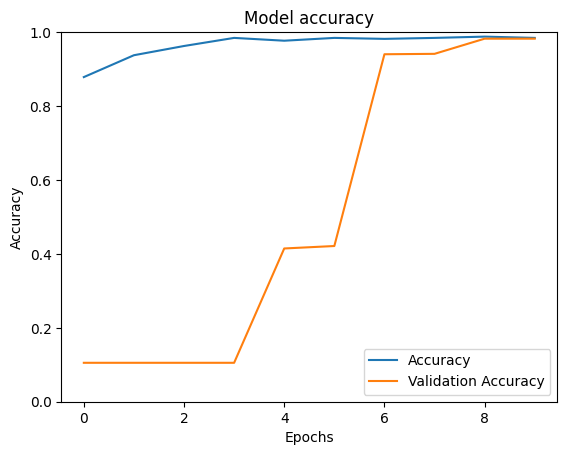

In [36]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0,1)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

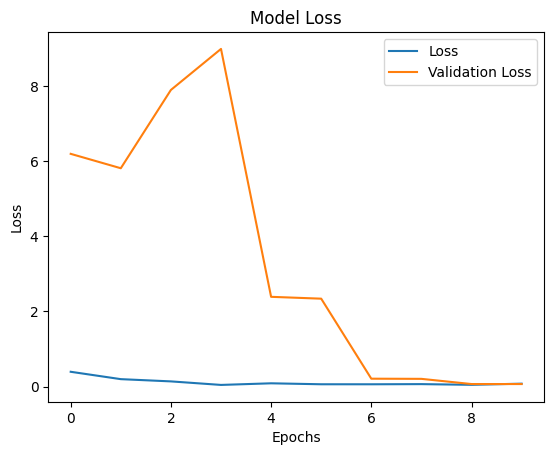

In [37]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(model.predict(x_test),axis = 1)
y_true = np.argmax(y_test,axis=1)
accuracy_score(y_true,y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


0.9830339321357285

In [39]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='weighted')

0.9829909809458989

In [40]:
from sklearn.metrics import recall_score
recall_score(y_true,y_pred,average='weighted')

0.9830339321357285

In [41]:
from sklearn.metrics import precision_score
precision_score(y_true,y_pred,average='weighted')

0.9831443702669902

In [42]:
f = open('history.pckl', 'wb')
pickle.dump(hist.history, f)
f.close()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.98      0.99      0.98       120
           2       0.98      0.99      0.99       107
           3       0.98      0.99      0.99       105
           4       0.97      1.00      0.98        91
           5       0.99      0.98      0.99       102
           6       0.99      1.00      0.99        86
           7       0.97      0.96      0.97       107
           8       1.00      0.98      0.99        91
           9       0.99      0.95      0.97        93

    accuracy                           0.98      1002
   macro avg       0.98      0.98      0.98      1002
weighted avg       0.98      0.98      0.98      1002



In [ ]:
from keras.models import load_model
model.save('my_model.h5')